In [1]:
import numpy as np
import os
import pandas as pd
print(os.getcwd())

D:\Studies\Machine Learning\Analytic vidhya\loan


In [2]:
train =  pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
loan_id = test.Loan_ID

In [3]:
print(train.isnull().sum())
print(train.shape)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 13)


In [4]:
print(test.isnull().sum())
print(test.shape)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
(367, 12)


In [5]:
train.drop(['Loan_ID'],axis = 1,inplace = True)
test.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
(train.head(20))

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


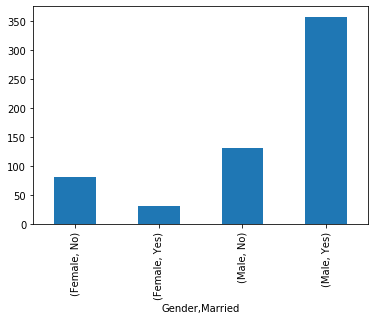

In [7]:
groups = train.groupby(['Gender','Married']).size()
groups.plot.bar()
# from the graph we found that the most of the male are married similarly most of the female are unmarried.
# filling the gender like if married/unmarried then male 
# filling the married like if male - > married ,female -> unmarried

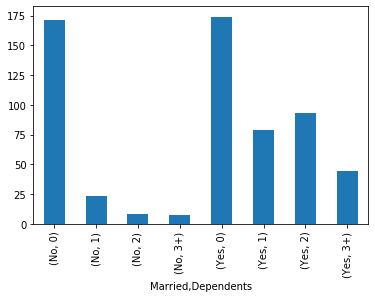

In [8]:
groups = train.groupby(['Married',"Dependents"]).size()
groups.plot.bar()
# from the graph we come to know that most the married they have more than 0 dependents

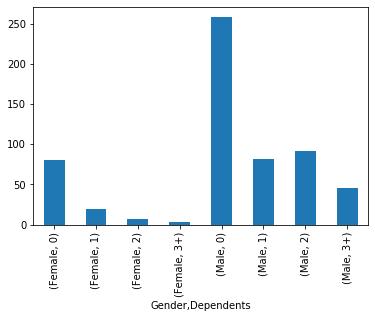

In [9]:
groups = train.groupby(['Gender',"Dependents"]).size()
groups.plot.bar()
# from this plot we come to know that most of the male as well as female have 0  dependents 
train['Dependents'].fillna('0',inplace=True)
test['Dependents'].fillna('0',inplace=True)

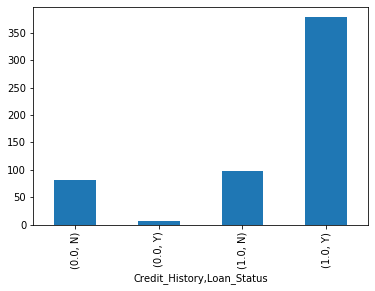

In [10]:
groups = train.groupby(['Credit_History','Loan_Status']).size()
groups.plot.bar()
# from the graph we found that if their loan status is Y then their credit history is 1 
# if loan status is N then their credit history is 0

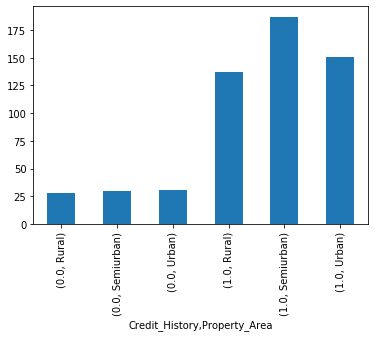

In [11]:
groups = train.groupby(['Credit_History','Property_Area']).size()
groups.plot.bar()


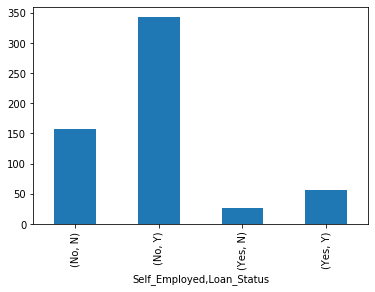

In [12]:
groups = train.groupby(['Self_Employed','Loan_Status']).size()
groups.plot.bar()
# whatever may be the loan status the self_employed is no so we can replace all self_employed null value with NO

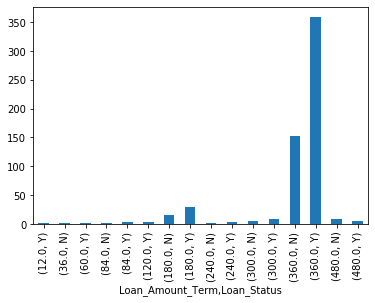

In [13]:
groups = train.groupby(['Loan_Amount_Term','Loan_Status']).size()
groups.plot.bar()
# from the graph we found that the loan amount term is "360"  what ever may be the loan status

In [14]:
def fill_na_values_with_conditions():
    # from the graph we found that the most of the male are married similarly most of the female are unmarried.
    train['Gender'] = np.where(train['Married']=='Yes','Male',train.Gender)
    train['Gender'] = np.where(train['Married']=='No','Female',train.Gender)
    test['Gender'] = np.where(test['Married']=='Yes','Male',test.Gender)
    test['Gender'] = np.where(test['Married']=='No','Female',test.Gender)
    
    # filling the married like if male then married and if female then unmarrried
    train['Married'] = np.where(train['Gender']=='Male','Yes',train.Married)
    train['Married'] = np.where(train['Gender']=='Female','No',train.Married)
    
    # from the graph we found that if their loan status is Y then their credit history is 1 
    # if loan status is N then their credit history is 0
    train['Credit_History'] = np.where(train['Loan_Status']=='Y','1',train.Credit_History)
    train['Credit_History'] = np.where(train['Loan_Status']=='N','0',train.Credit_History)
    test['Credit_History'].fillna('1',inplace=True)
 
    # whatever may be the loan status the self_employed is no so we can replace all self_employed null value with NO
    train['Self_Employed'].fillna('No',inplace=True)
    test['Self_Employed'].fillna('No',inplace=True)
    
    # from the graph we found that the loan amount term is "360"  what ever may be the loan status
    train['Loan_Amount_Term'].fillna('360',inplace=True)
    test['Loan_Amount_Term'].fillna('360',inplace=True)
    
    # now finally the loan amount can not be determined so we are filling the loan amount with the mean value
    train['LoanAmount'].fillna(train.LoanAmount.mean(),inplace=True)
    test['LoanAmount'].fillna(test.LoanAmount.mean(),inplace=True)
    

fill_na_values_with_conditions()

In [15]:
def load_label_with_values():
    Prop = {'Urban':0,'Semiurban':0.5,'Rural':1}
    train['Property_Area'] = train['Property_Area'].map(Prop)
    test['Property_Area'] = test['Property_Area'].map(Prop)
    
    gender = {'Male':0,'Female':1}
    train.Gender = train.Gender.map(gender)
    test.Gender = test.Gender.map(gender)
    
    yno = {'Yes':1,'No':0}
    train.Self_Employed  = train.Self_Employed.map(yno)
    test.Self_Employed = test.Self_Employed.map(yno)
    train.Married  = train.Married.map(yno)
    test.Married = test.Married.map(yno)
    
    edu = {'Graduate':1,'Not Graduate':0}
    train.Education = train.Education.map(edu)
    test.Education = test.Education.map(edu)
    
    #filling the yes no for target variable in train 
    train['Loan_Status']=train['Loan_Status'].map({'Y':1,'N':0})
    
    train.Dependents=train.Dependents.map({'0':0,'1':1,'2':2,"3+":3})
    test.Dependents=test.Dependents.map({'0':0,'1':1,'2':2,"3+":3})
    
    
load_label_with_values()

In [16]:
print(train.isnull().sum())
print(train.shape)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 12)


In [17]:
print(test.isnull().sum())
print(test.shape)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64
(367, 11)


In [18]:
train.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360,1,0.0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360,0,1.0,0
2,0,1,0,1,1,3000,0.0,66.000000,360,1,0.0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360,1,0.0,1
4,1,0,0,1,0,6000,0.0,141.000000,360,1,0.0,1
5,0,1,2,1,1,5417,4196.0,267.000000,360,1,0.0,1
6,0,1,0,0,0,2333,1516.0,95.000000,360,1,0.0,1
7,0,1,3,1,0,3036,2504.0,158.000000,360,0,0.5,0
8,0,1,2,1,0,4006,1526.0,168.000000,360,1,0.0,1
9,0,1,1,1,0,12841,10968.0,349.000000,360,0,0.5,0


In [19]:
print(train.shape)
print(test.shape)

(614, 12)
(367, 11)


In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train.drop(['Loan_Status'],axis=1),train.Loan_Status,test_size=0.25)

from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(x_train, y_train)
print(clf.score(x_train,y_train))

1.0


In [21]:
# finding the cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x_train, y_train, cv=5)
print(scores)


[1. 1. 1. 1. 1.]


In [22]:
def convert_df(y_pred,name):
    sub = pd.DataFrame()
    sub['Loan_ID'],sub['Loan_Status']=loan_id,y_pred
    sub['Loan_Status'].replace(0,'N',inplace=True)
    sub['Loan_Status'].replace(1,'Y',inplace=True)
    sub.to_csv('{}.csv'.format(name),index=False)
    print(sub.head(5))

In [23]:
# we are using the same classifier to the final prediction
X = train.drop(['Loan_Status'],axis=1)
Y = train.Loan_Status
classifier = ExtraTreesClassifier(n_estimators=50)
classifier = classifier.fit(X,Y)
y_pred = clf.predict(test)

In [24]:
# calling the convert_df function to create submission file
convert_df(y_pred,'Submission')

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y
